## Name - Tushar Mishra
## Roll No - 170010027
## Assignment 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pi=np.pi

In [3]:
def velocity_pv(z,z0,g):
    v=-1j*g/(2*pi*(z-z0))
    return(np.conj(v))

In [4]:
def velocity(z,g):
    n=len(z)
    result=[]
    for i in range(n):
        vi=0;
        for j in range(n):
            if(i!=j):
                vi+=velocity_pv(z[i],z[j],g[j])
        result.append(vi)
    result=np.asarray(result)
    return (result)   

In [5]:
def rk2(z,gamma,a,dt=0.01):
    k1 = np.zeros_like(z)
    k2 = np.zeros_like(z)
    k1 = velocity(z,gamma)
    zt = z + k1*dt
    k2 = velocity(zt,gamma)
#     print(k1,k2)
    z += (k1+k2)*(dt/2)
#     print(z)
    return z

In [6]:
def integrate(z,gamma,dt,tf):
    t = 0
    while (t<tf):
        z=rk2(z,gamma,dt)
#         print(z)
        t=t+dt
    return(z)

In [7]:
def rollup(n,dt=0.01,tf=2):
    dx = 1.0/n
    x = np.linspace(-0.5+dx/2 , 0.5-dx/2 , n)
    y = np.zeros(n)
    z = x + 1j*y
    gamma = 4*x*dx/(np.sqrt(1-4*x*x))
    z=integrate(z,gamma,dt,tf)
    x=np.real(z)
    y=np.imag(z)
    plt.plot(x,y)
    plt.show()

## Simulation using 100 point vortices

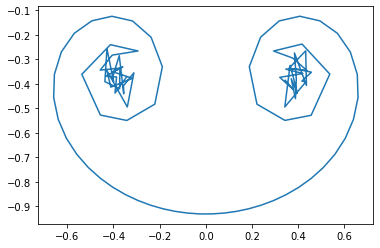

In [8]:
rollup(100)

## Simulation using 20 point vortices

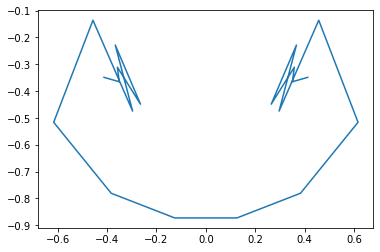

In [9]:
rollup(20)

## Simulation using 30 point vortices

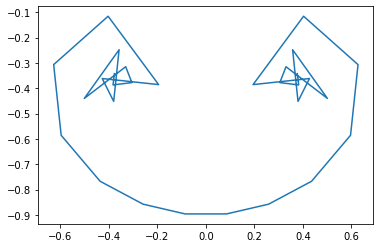

In [9]:
rollup(30)

## Using 40 point vortices

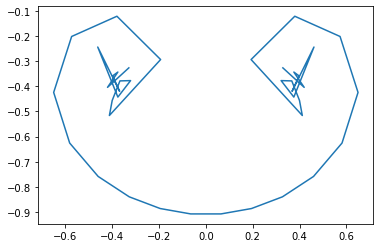

In [10]:
rollup(40)

In [11]:
def velocity_krasny(z,z0,g,delta):
    zt=z-z0
    x=zt.real
    y=zt.imag
    return g/(2*pi*(x*x+y*y+delta*delta))*complex(-y,x)

In [12]:
def velocity1(z,g,delta):
    n=len(z)
    result=[]
    for i in range(n):
        vi=0;
        for j in range(n):
            if(i!=j):
                vi+=velocity_krasny(z[i],z[j],g[j],delta)
        result.append(vi)
    result=np.asarray(result)
    return (result)   

def integrate(z,gamma,dt,tf,delta):
    t = 0
    while (t<tf):
        z=rk2_k(z,gamma,delta,dt)
#         print(z)
        t=t+dt
    return(z)

def rk2_k(z,gamma,delta,dt=0.01):
    k1 = np.zeros_like(z)
    k2 = np.zeros_like(z)
    k1 = velocity1(z,gamma,delta)
    zt = z + k1*dt
    k2 = velocity1(zt,gamma,delta)
#     print(k1,k2)
    z += (k1+k2)*(dt/2)
#     print(z)
    return z

In [13]:
def krasny_blob(n,dt=0.01,tf=2,factor=5):
    dx = 1.0/n
    delta = factor*dx
    x = np.linspace(-0.5+dx/2 , 0.5-dx/2 , n)
    y = np.zeros(n)
    z = x + 1j*y
    gamma = 4*x*dx/(np.sqrt(1-4*x*x))
    z=integrate(z,gamma,dt,tf,delta)
    x=np.real(z)
    y=np.imag(z)
    plt.plot(x,y)
    plt.show()

## Using Krasny blob delta = 5*dx

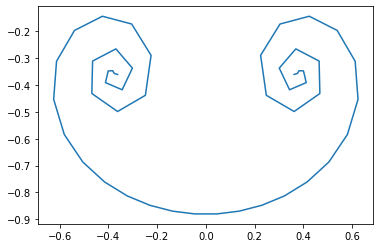

In [14]:
krasny_blob(50,tf=2,factor=5)

## Krasny blob with delta=3*dx

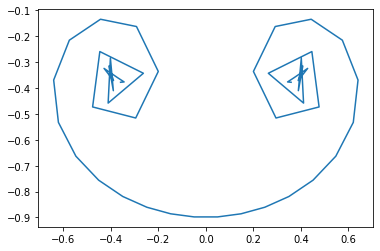

In [401]:
krasny_blob(50,factor=3)

In [11]:
def krasny_blob2(n,dt=0.01,tf=2,factor=5):
    dx=1.0/n
    theta=np.linspace(-pi/2+dx/2,pi/2-dx/2,n)
    delta = factor*dx
    x = 0.5*np.sin(theta)
    y = np.zeros(n)
    z = x + 1j*y
    gamma = 4*x*dx/(np.sqrt(1-4*x*x))
    z=integrate(z,gamma,dt,tf,delta)
    x=np.real(z)
    y=np.imag(z)
    plt.plot(x,y)
    plt.show()

## Krasny blob with sinusoidal positioning of points with delta=11*dx and 20 blobs

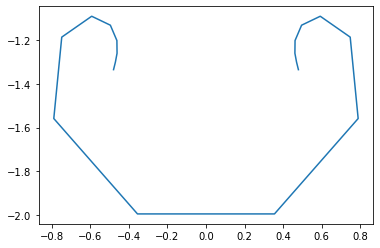

In [64]:
krasny_blob2(20,dt=0.01,factor=11)

## Krasny blob with sinusoidal positioning of points with delta=30*dx and 50 blobs

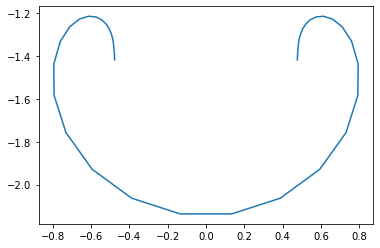

In [81]:
krasny_blob2(50,tf=2,factor=30)

## Krasny blob with sinusoidal positioning of points with delta=10*dx and 20 blobs

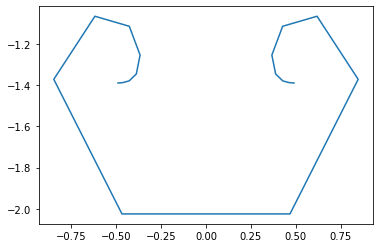

In [78]:
krasny_blob2(20,tf=2,factor=10)